In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, classification_report, roc_curve, auc, confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_excel('Pumpkin_Seeds_Dataset.xlsx')
df

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,79637,1224.710,533.1513,190.4367,80381,318.4289,0.9340,0.9907,0.4888,0.6672,2.7996,0.5973,Ürgüp Sivrisi
2496,69647,1084.318,462.9416,191.8210,70216,297.7874,0.9101,0.9919,0.6002,0.7444,2.4134,0.6433,Ürgüp Sivrisi
2497,87994,1210.314,507.2200,222.1872,88702,334.7199,0.8990,0.9920,0.7643,0.7549,2.2828,0.6599,Ürgüp Sivrisi
2498,80011,1182.947,501.9065,204.7531,80902,319.1758,0.9130,0.9890,0.7374,0.7185,2.4513,0.6359,Ürgüp Sivrisi


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2500 non-null   int64  
 1   Perimeter          2500 non-null   float64
 2   Major_Axis_Length  2500 non-null   float64
 3   Minor_Axis_Length  2500 non-null   float64
 4   Convex_Area        2500 non-null   int64  
 5   Equiv_Diameter     2500 non-null   float64
 6   Eccentricity       2500 non-null   float64
 7   Solidity           2500 non-null   float64
 8   Extent             2500 non-null   float64
 9   Roundness          2500 non-null   float64
 10  Aspect_Ration      2500 non-null   float64
 11  Compactness        2500 non-null   float64
 12  Class              2500 non-null   object 
dtypes: float64(10), int64(2), object(1)
memory usage: 254.0+ KB


In [4]:
df.duplicated().sum()

0

In [5]:
df.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,80658.220800,1130.279015,456.601840,225.794921,81508.084400,319.334230,0.860879,0.989492,0.693205,0.791533,2.041702,0.704121
std,13664.510228,109.256418,56.235704,23.297245,13764.092788,26.891920,0.045167,0.003494,0.060914,0.055924,0.315997,0.053067
min,47939.000000,868.485000,320.844600,152.171800,48366.000000,247.058400,0.492100,0.918600,0.468000,0.554600,1.148700,0.560800
25%,70765.000000,1048.829750,414.957850,211.245925,71512.000000,300.167975,0.831700,0.988300,0.658900,0.751900,1.801050,0.663475
50%,79076.000000,1123.672000,449.496600,224.703100,79872.000000,317.305350,0.863700,0.990300,0.713050,0.797750,1.984200,0.707700
75%,89757.500000,1203.340500,492.737650,240.672875,90797.750000,338.057375,0.897025,0.991500,0.740225,0.834325,2.262075,0.743500
max,136574.000000,1559.450000,661.911300,305.818000,138384.000000,417.002900,0.948100,0.994400,0.829600,0.939600,3.144400,0.904900


In [6]:
df.describe(include = 'object')

,Class
count,2500
unique,2
top,Çerçevelik
freq,1300


In [7]:
df['Class'].unique()

array(['Çerçevelik', 'Ürgüp Sivrisi'], dtype=object)

In [8]:
print(df['Class'].value_counts())

Class
Çerçevelik       1300
Ürgüp Sivrisi    1200
Name: count, dtype: int64


C:\Users\USER\AppData\Local\Temp\ipykernel_305164\3323889416.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df, palette='magma')


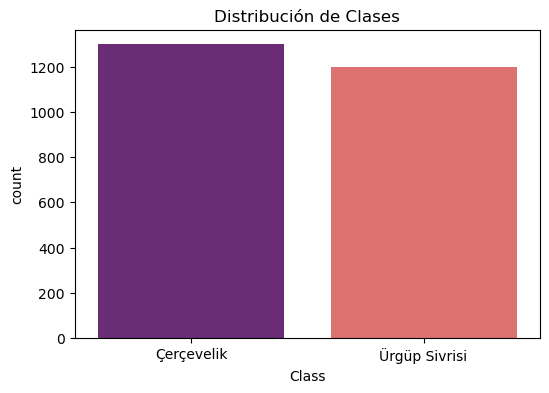

In [9]:
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df, palette='magma')
plt.title('Distribución de Clases')
plt.show()


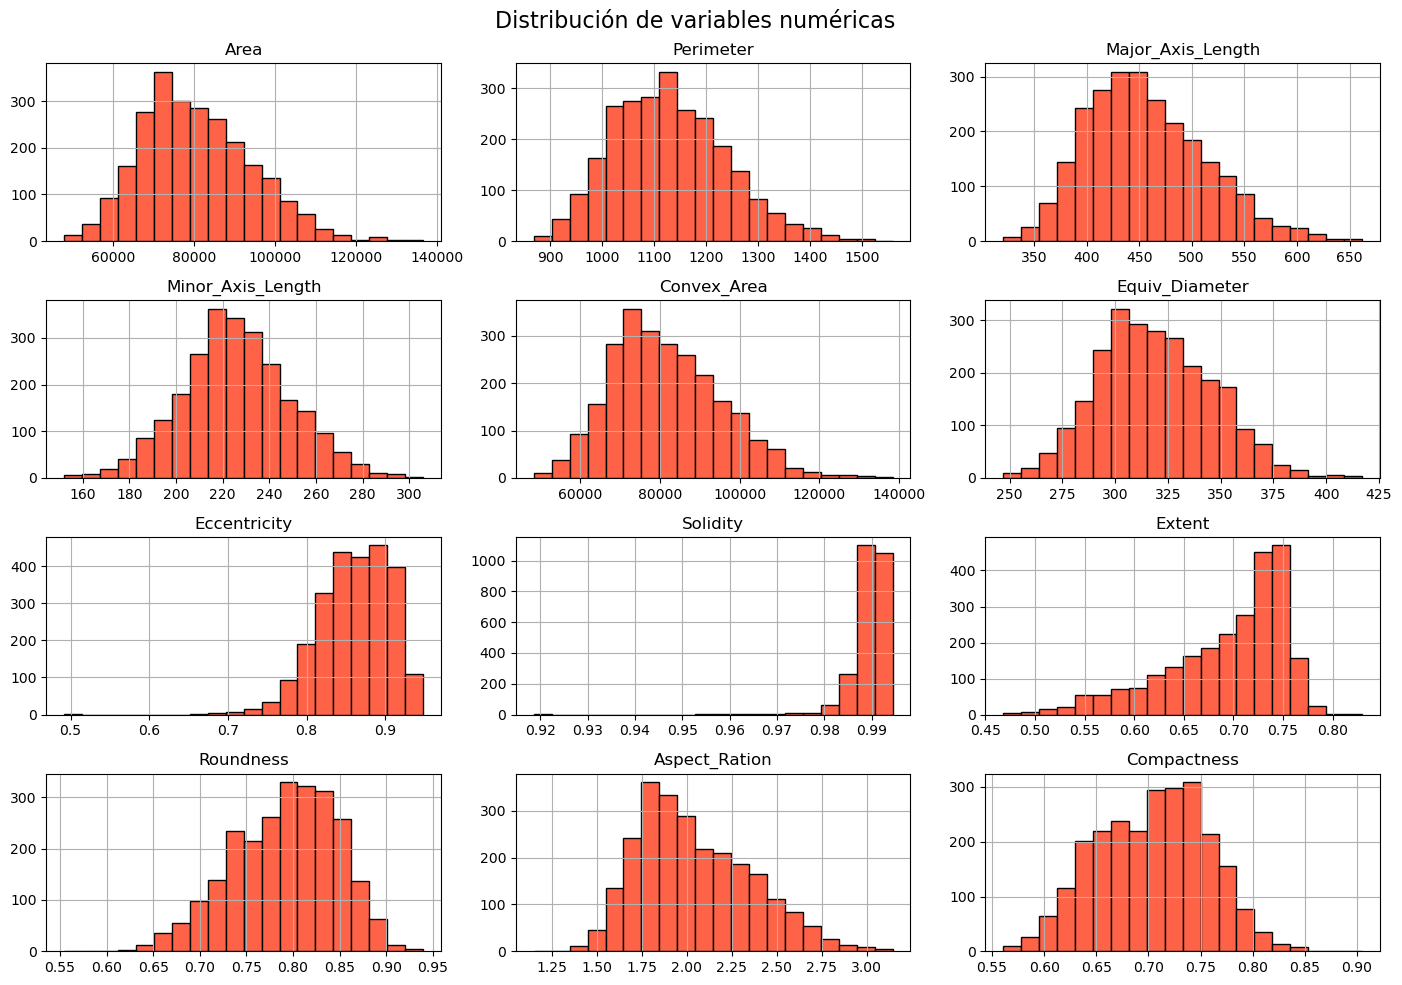

In [10]:
df.hist(figsize=(14,10), bins=20, color='tomato', edgecolor='black')
plt.suptitle('Distribución de variables numéricas', fontsize=16)
plt.tight_layout()
plt.show()


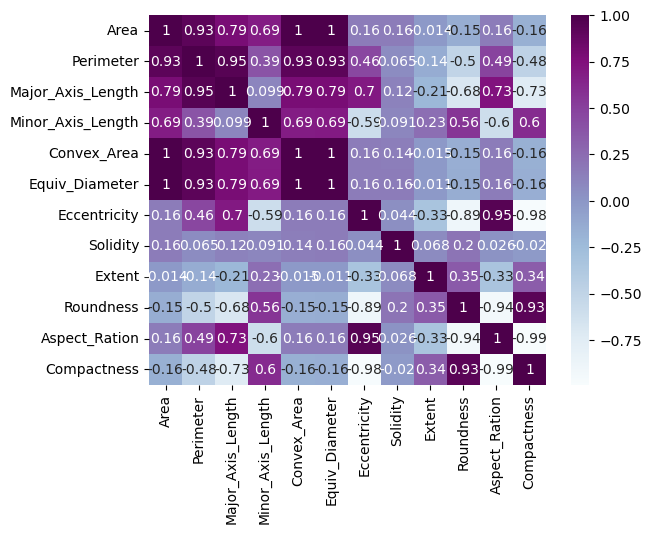

In [11]:
sns.heatmap(df.corr(numeric_only = True), annot = True, cmap="BuPu")

plt.rcParams['figure.figsize'] = (10,10)

plt.show()


In [12]:
df['Class'] = df['Class'].map({'Çerçevelik': 1, 'Ürgüp Sivrisi': 0})
df

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,1
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,1
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,1
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,1
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,79637,1224.710,533.1513,190.4367,80381,318.4289,0.9340,0.9907,0.4888,0.6672,2.7996,0.5973,0
2496,69647,1084.318,462.9416,191.8210,70216,297.7874,0.9101,0.9919,0.6002,0.7444,2.4134,0.6433,0
2497,87994,1210.314,507.2200,222.1872,88702,334.7199,0.8990,0.9920,0.7643,0.7549,2.2828,0.6599,0
2498,80011,1182.947,501.9065,204.7531,80902,319.1758,0.9130,0.9890,0.7374,0.7185,2.4513,0.6359,0


In [22]:
X = df.iloc[:, 0:12]  # columnas de la 0 a la 4
y = df['Class']


In [23]:
X

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557
...,...,...,...,...,...,...,...,...,...,...,...,...
2495,79637,1224.710,533.1513,190.4367,80381,318.4289,0.9340,0.9907,0.4888,0.6672,2.7996,0.5973
2496,69647,1084.318,462.9416,191.8210,70216,297.7874,0.9101,0.9919,0.6002,0.7444,2.4134,0.6433
2497,87994,1210.314,507.2200,222.1872,88702,334.7199,0.8990,0.9920,0.7643,0.7549,2.2828,0.6599
2498,80011,1182.947,501.9065,204.7531,80902,319.1758,0.9130,0.9890,0.7374,0.7185,2.4513,0.6359


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [25]:
#Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [27]:
log_pred = logreg.predict(X_test)

Text(0.5, 36.72222222222221, 'Predicted Values')

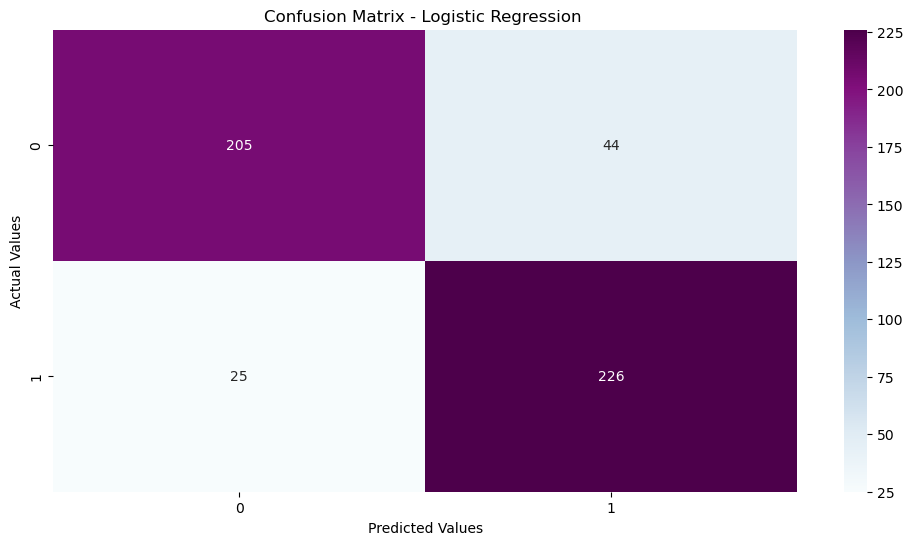

In [56]:
cm=confusion_matrix(y_test,log_pred)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix - Logistic Regression ")
sns.heatmap(cm, annot=True,fmt='d', cmap='BuPu')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")

In [29]:
print(classification_report(y_test, log_pred))

              precision    recall  f1-score   support

           0       0.89      0.82      0.86       249
           1       0.84      0.90      0.87       251

    accuracy                           0.86       500
   macro avg       0.86      0.86      0.86       500
weighted avg       0.86      0.86      0.86       500



In [30]:
#SVM
sv = svm.SVC(kernel='linear')
sv.fit(X_train, y_train)

SVC(kernel='linear')

In [31]:
svm_pred = sv.predict(X_test)

Text(0.5, 36.72222222222221, 'Predicted Values')

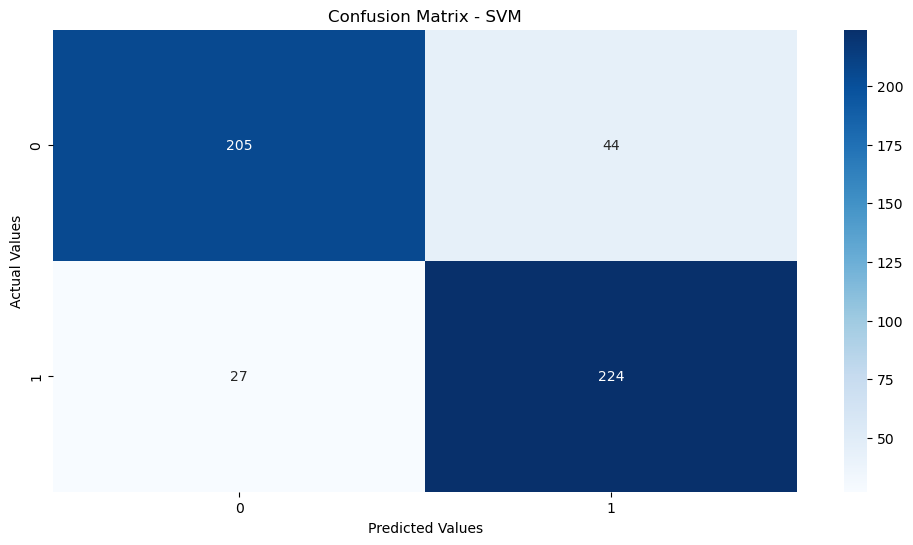

In [57]:
cm=confusion_matrix(y_test,svm_pred)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix - SVM")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")

In [33]:
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85       249
           1       0.84      0.89      0.86       251

    accuracy                           0.86       500
   macro avg       0.86      0.86      0.86       500
weighted avg       0.86      0.86      0.86       500



In [34]:
#Decision Tree
dtc = DecisionTreeClassifier(criterion='gini',max_depth=7)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7)

In [36]:
dtc_pred = dtc.predict(X_test)

Text(0.5, 36.72222222222221, 'Predicted Values')

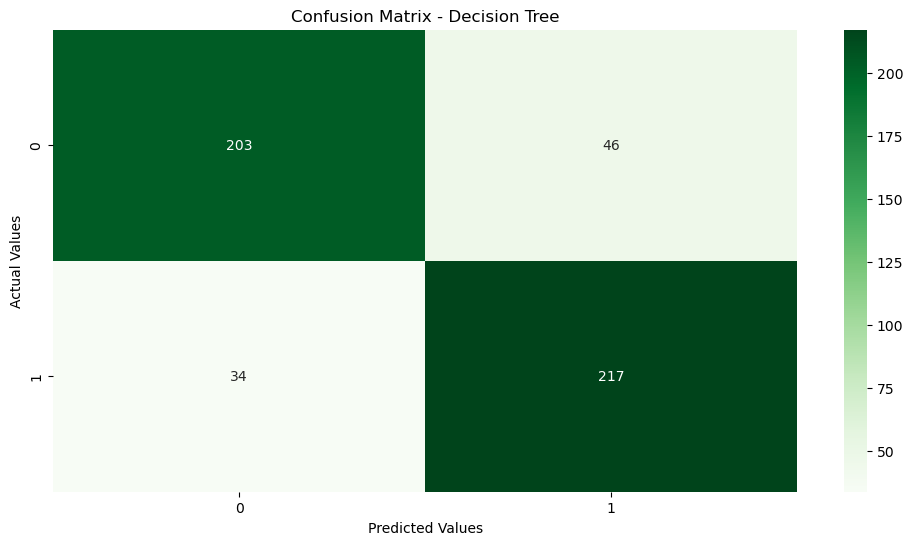

In [58]:
cm=confusion_matrix(y_test,dtc_pred)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix - Decision Tree")
sns.heatmap(cm, annot=True,fmt='d', cmap='Greens')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")

In [38]:
print(classification_report(y_test, dtc_pred))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       249
           1       0.83      0.86      0.84       251

    accuracy                           0.84       500
   macro avg       0.84      0.84      0.84       500
weighted avg       0.84      0.84      0.84       500



In [39]:
#Random Forest
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [40]:
rfc_pred = rfc.predict(X_test)

Text(0.5, 36.72222222222221, 'Predicted Values')

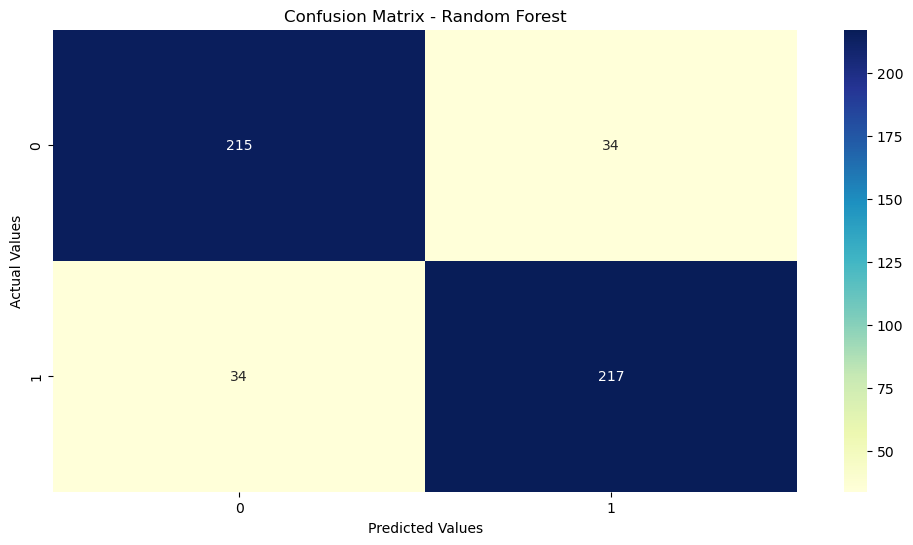

In [59]:
cm=confusion_matrix(y_test,rfc_pred)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix - Random Forest")
sns.heatmap(cm, annot=True,fmt='d', cmap='YlGnBu')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")

In [42]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       249
           1       0.86      0.86      0.86       251

    accuracy                           0.86       500
   macro avg       0.86      0.86      0.86       500
weighted avg       0.86      0.86      0.86       500



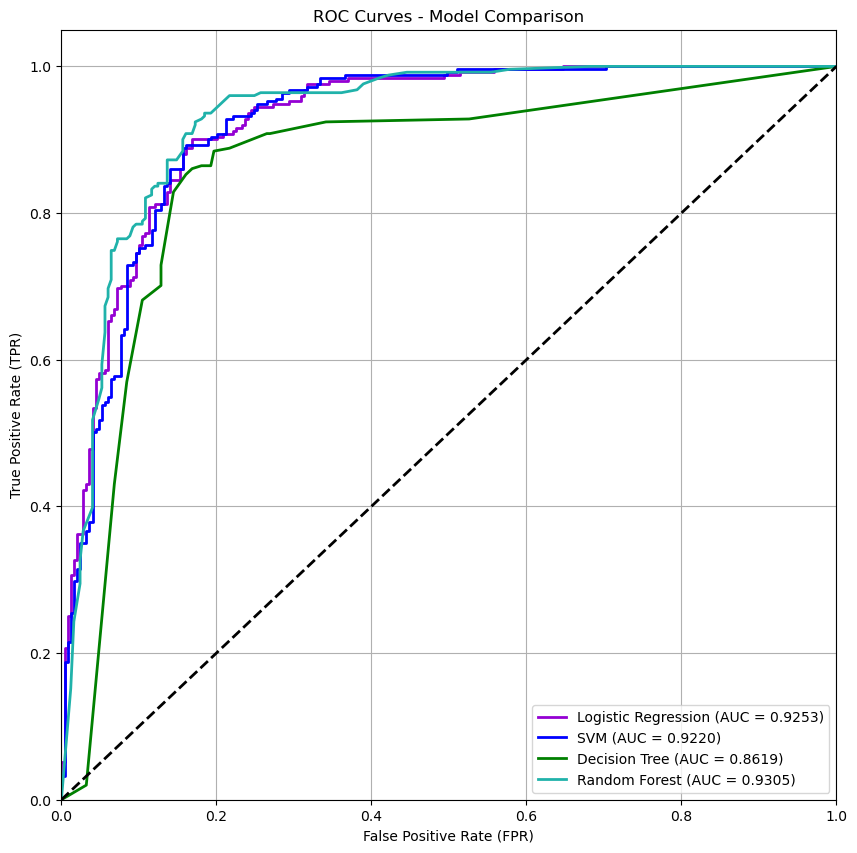

In [60]:

plt.figure()

# ---------- Logistic Regression ----------
y_scores_lr = logreg.predict_proba(X_test)[:, 1]
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_scores_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)
plt.plot(fpr_lr, tpr_lr, color='darkviolet', lw=2,
         label='Logistic Regression (AUC = %0.4f)' % roc_auc_lr)

# ---------- SVM ----------
y_scores_svm = sv.decision_function(X_test)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_scores_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)
plt.plot(fpr_svm, tpr_svm, color='blue', lw=2,
         label='SVM (AUC = %0.4f)' % roc_auc_svm)

# ---------- Decision Tree ----------
y_scores_dtc = dtc.predict_proba(X_test)[:, 1]
fpr_dtc, tpr_dtc, _ = roc_curve(y_test, y_scores_dtc)
roc_auc_dtc = auc(fpr_dtc, tpr_dtc)
plt.plot(fpr_dtc, tpr_dtc, color='green', lw=2,
         label='Decision Tree (AUC = %0.4f)' % roc_auc_dtc)

# ---------- Random Forest ----------
y_scores_rfc = rfc.predict_proba(X_test)[:, 1]
fpr_rfc, tpr_rfc, _ = roc_curve(y_test, y_scores_rfc)
roc_auc_rfc = auc(fpr_rfc, tpr_rfc)
plt.plot(fpr_rfc, tpr_rfc, color='lightseagreen', lw=2,
         label='Random Forest (AUC = %0.4f)' % roc_auc_rfc)

# ---------- Configuración de la gráfica ----------
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curves - Model Comparison')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
